### usando RandomForest, XGBoost

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import joblib

# Leitura do arquivo parkinsons.data
df = pd.read_csv('parkinsons.data')

# Divisão dos dados em features e target
X = df.drop(['name', 'status'], axis=1)
y = df['status']

# Normalização dos dados
X = (X - X.min()) / (X.max() - X.min())

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinamento do modelo RandomForest
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
# Salvando o modelo treinado em formato .h5
joblib.dump(rfc, 'RandomForest.h5')

# Avaliação do modelo RandomForest
print("RandomForestClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("AUC Score:", roc_auc_score(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

# Treinamento do modelo XGBoost
xgbF = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgbF.fit(X_train, y_train)
y_pred_xgb = xgbF.predict(X_test)
# Salvando o modelo treinado em formato .h5
joblib.dump(xgbF, 'XGBClassifier.h5')


# Avaliação do modelo XGBoost
print("XGBClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("AUC Score:", roc_auc_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Salvando um exemplo de arquivo para teste
X_test.iloc[0:5].to_csv('test_file.csv', index=False)


RandomForestClassifier
Accuracy: 0.9322033898305084
AUC Score: 0.8886363636363638
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59

XGBClassifier
Accuracy: 0.9152542372881356
AUC Score: 0.8333333333333334
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.90      1.00      0.95        44

    accuracy                           0.92        59
   macro avg       0.95      0.83      0.87        59
weighted avg       0.92      0.92      0.91        59



In [24]:
### Incluindo LATEX
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import xgboost as xgb
from tabulate import tabulate
import matplotlib.pyplot as plt
import joblib

# Carrega o conjunto de dados
df = pd.read_csv('parkinsons.data')

# Separa as features e a variável alvo
y = df['status']
X = df.drop(['name', 'status'], axis=1)

# Divide o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Cria o classificador Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Treina o classificador
rf_clf.fit(X_train, y_train)

# Realiza a predição no conjunto de teste
rf_y_pred = rf_clf.predict(X_test)

# Salvando o modelo treinado em formato .h5
joblib.dump(rf_clf, 'RandomForest.h5')

# Calcula as métricas de avaliação
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

# Calcula a curva ROC e a área sob a curva (AUC)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_y_pred)
rf_auc = roc_auc_score(y_test, rf_y_pred)

# Cria o classificador XGBoost
xgb_clf = xgb.XGBClassifier(random_state=42)

# Treina o classificador
xgb_clf.fit(X_train, y_train)

# Realiza a predição no conjunto de teste
xgb_y_pred = xgb_clf.predict(X_test)

# Salvando o modelo treinado em formato .h5
joblib.dump(xgb_clf, 'XGBClassifier.h5')

# Calcula as métricas de avaliação
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)

# Calcula a curva ROC e a área sob a curva (AUC)
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_y_pred)
xgb_auc = roc_auc_score(y_test, xgb_y_pred)

# Imprime as métricas em formato de tabela LaTeX utilizando a biblioteca tabulate
header = ['Métrica', 'Random Forest', 'XGBoost']
rows = [['Acurácia', round(rf_accuracy, 4), round(xgb_accuracy, 4)],
        ['Precisão', round(rf_precision, 4), round(xgb_precision, 4)],
        ['Recall', round(rf_recall, 4), round(xgb_recall, 4)],
        ['F1-Score', round(rf_f1, 4), round(xgb_f1, 4)],
        ['AUC-ROC', round(rf_auc, 4), round(xgb_auc, 4)]]
table = tabulate(rows, headers=header, tablefmt='pipe', floatfmt=".4f")
print(table)

#####################################################################################33





| Métrica   |   Random Forest |   XGBoost |
|:----------|----------------:|----------:|
| Acurácia  |          0.9322 |    0.9153 |
| Precisão  |          0.9348 |    0.8980 |
| Recall    |          0.9773 |    1.0000 |
| F1-Score  |          0.9556 |    0.9462 |
| AUC-ROC   |          0.8886 |    0.8333 |


In [28]:
# testa em dados externos
rfc_load = joblib.load('RandomForest.h5')
xgb_teste = joblib.load('XGBClassifier.h5')

# Carrega o arquivo CSV
X_teste = pd.read_csv('parkinsons_aleatorio_geral.csv')
y_teste = X_teste['status']
X_teste=X_teste.drop(['name','status'], axis=1)

# Predição do conjunto de teste com os modelos treinados
rfc_pred = rf_clf.predict(X_teste)
xgb_pred = xgb_clf.predict(X_teste)

# Métricas dos modelos
rfc_report = classification_report(y_teste, rfc_pred)
rfc_confusion = confusion_matrix(y_teste, rfc_pred)
rfc_auc_score = roc_auc_score(y_teste, rfc_pred)

xgb_report = classification_report(y_teste, xgb_pred)
xgb_confusion = confusion_matrix(y_teste, xgb_pred)
xgb_auc_score = roc_auc_score(y_teste, xgb_pred)

# Apresentação das métricas
print('Random Forest')
print(rfc_report)
print('AUC: ', rfc_auc_score)
print(rfc_confusion)

print('XGBoost')
print(xgb_report)
print('AUC: ', xgb_auc_score)
print(xgb_confusion)



Random Forest
              precision    recall  f1-score   support

           0       0.99      0.49      0.66      1200
           1       0.66      0.99      0.80      1200

    accuracy                           0.74      2400
   macro avg       0.83      0.74      0.73      2400
weighted avg       0.83      0.74      0.73      2400

AUC:  0.7437499999999999
[[ 592  608]
 [   7 1193]]
XGBoost
              precision    recall  f1-score   support

           0       0.89      0.40      0.55      1200
           1       0.61      0.95      0.74      1200

    accuracy                           0.67      2400
   macro avg       0.75      0.67      0.65      2400
weighted avg       0.75      0.67      0.65      2400

AUC:  0.6745833333333333
[[ 481  719]
 [  62 1138]]


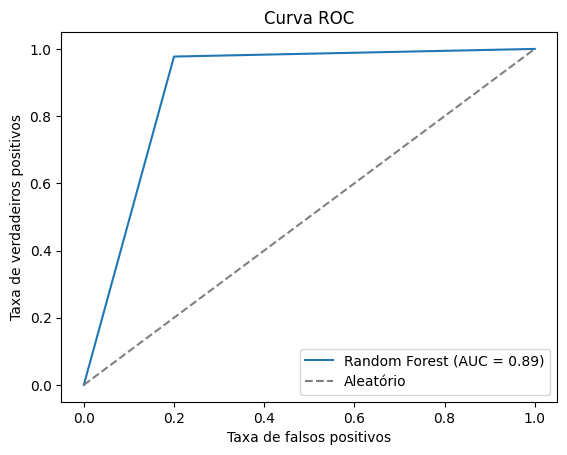

In [8]:
# Plota a curva ROC
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatório')
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [12]:
# Testando os Modelos

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from tabulate import tabulate
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Carregamento dos modelos salvos
rfc = RandomForestClassifier()
rfc_load = joblib.load('RandomForest.h5')

xgb_load = xgb.XGBClassifier()
xgb_teste = joblib.load('XGBClassifier.h5')

# Carregamento e normalização do arquivo de teste
df_teste = pd.read_csv('parkinsons_aleatorio_ruido.csv')
X_teste = df_teste.drop(['name', 'status'], axis=1)
y_teste = df_teste['status']

# Normalização dos dados
X_teste = (X_teste - X_teste.min()) / (X_teste.max() - X_teste.min())

# Predição do conjunto de teste com os modelos treinados
rfc_pred = rfc.predict(X_teste)
xgb_pred = xgb_load.predict(X_teste)

# Métricas dos modelos
rfc_report = classification_report(y_teste, rfc_pred)
rfc_confusion = confusion_matrix(y_teste, rfc_pred)
rfc_auc_score = roc_auc_score(y_teste, rfc_pred)

xgb_report = classification_report(y_teste, xgb_pred)
xgb_confusion = confusion_matrix(y_teste, xgb_pred)
xgb_auc_score = roc_auc_score(y_teste, xgb_pred)

# Apresentação das métricas
print('Random Forest')
print(rfc_report)
print('AUC: ', rfc_auc_score)
print(rfc_confusion)

print('XGBoost')
print(xgb_report)
print('AUC: ', xgb_auc_score)
print(xgb_confusion)


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.